In [31]:
from langgraph.graph import START, END, StateGraph, MessagesState
from typing import TypedDict, Annotated

In [32]:
class ArithmeticOperations(TypedDict):
    value1: int
    value2: int
    result: Annotated[list[int], add]

In [ ]:
def add(state: ArithmeticOperations) -> ArithmeticOperations:
    #state['sum'] = 10 + 3
    state['sum'] = state['value1'] + state['value2']
    return 

def subtract(state: ArithmeticOperations) -> ArithmeticOperations:
    #state['difference'] = 10 - 3
    state['difference'] = state['value1'] - state['value2']
    return state

def multiply(state: ArithmeticOperations) -> ArithmeticOperations:
    #state['product'] = 10 * 3
    state['product'] = state['value1'] * state['value2']
    return state

def divide(state: ArithmeticOperations) -> ArithmeticOperations:
    #state['quotient'] = 10 // 3
    state['quotient'] = state['value1'] // state['value2']
    return state

def modulus(state: ArithmeticOperations) -> ArithmeticOperations:
    #state['remainder'] = 10 % 3
    state['remainder'] = state['value1'] % state['value2']
    return state

In [18]:
# Defininng Graph 
arithmetic_graph = StateGraph(ArithmeticOperations)

#Defining Nodes
arithmetic_graph.add_node("Addition", add)
arithmetic_graph.add_node("Subtraction", subtract )
arithmetic_graph.add_node("Multiplication", multiply)
arithmetic_graph.add_node("Int_Division", divide)
arithmetic_graph.add_node("Mod_Division", modulus)

#Defining Edges
arithmetic_graph.add_edge(START, "Addition")
arithmetic_graph.add_edge(START, "Subtraction")
arithmetic_graph.add_edge(START, "Multiplication")
arithmetic_graph.add_edge(START, "Int_Division")
arithmetic_graph.add_edge(START, "Mod_Division")

arithmetic_graph.add_edge("Addition", END)
arithmetic_graph.add_edge("Subtraction", END)
arithmetic_graph.add_edge("Multiplication", END)
arithmetic_graph.add_edge("Int_Division", END)
arithmetic_graph.add_edge("Mod_Division", END)

graph = arithmetic_graph.compile()

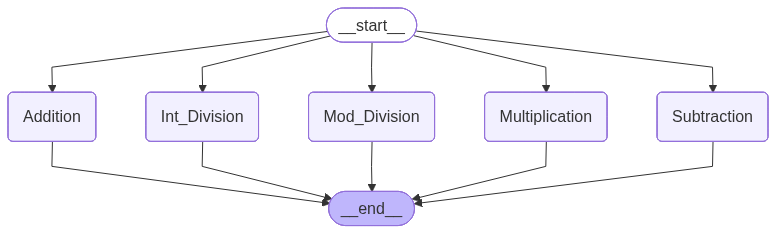

In [22]:
from utils import draw_graph
draw_graph(graph)

In [33]:
solution_state = graph.invoke({'value1': 10, 'value2': 3})
print(solution_state)

InvalidUpdateError: At key 'value1': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://docs.langchain.com/oss/python/langgraph/errors/INVALID_CONCURRENT_GRAPH_UPDATE